In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [38]:
from numpy.random import seed
seed(2)
tf.random.set_seed(2)


In [10]:
conv_illustration = keras.layers.Conv2D(filters=1, 
              strides=1, 
              padding='same',
              kernel_size=(3, 3))

input_vector = np.matrix([[0., 0., 0.], 
                          [0., 0., 0.], 
                          [0., 0., 0.]])

output = conv_illustration(np.expand_dims(np.expand_dims(input_vector, 0), 3))

print(f'Output shape: {np.squeeze(output).shape}')
print(f'Output: {np.squeeze(output)}')

Output shape: (3, 3)
Output: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
filter_example = np.matrix([[0, 0, 0], [1, 1, 1], [0, 0, 0]])

In [12]:
filter_example

matrix([[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]])

In [13]:
conv = keras.layers.Conv2D(filters=1, 
              strides=5, 
              padding='same',
              kernel_size=5)

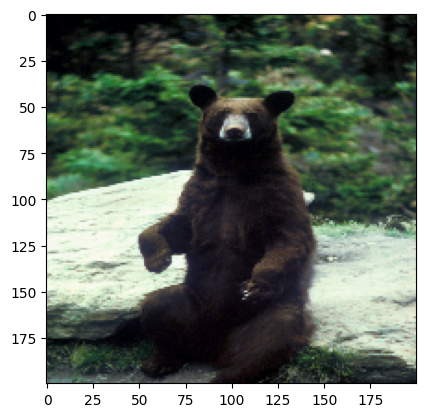

In [16]:
import urllib.request
import matplotlib.pyplot as plt
import cv2

# Public domain image
url = 'https://upload.wikimedia.org/wikipedia/commons/0/02/Black_bear_large.jpg'
urllib.request.urlretrieve(url, 'bear.jpg')

input_image = cv2.imread('bear.jpg')
input_image = cv2.resize(input_image, (200, 200))
plt.imshow(input_image)

In [17]:
input_image.shape

(200, 200, 3)

In [18]:
def preprocess_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype('float32')
    return np.expand_dims(img, 0)

In [19]:
input_image = preprocess_img(input_image)

In [20]:
convolved_filters = conv(input_image)

In [21]:
print(convolved_filters.shape)

(1, 40, 40, 1)


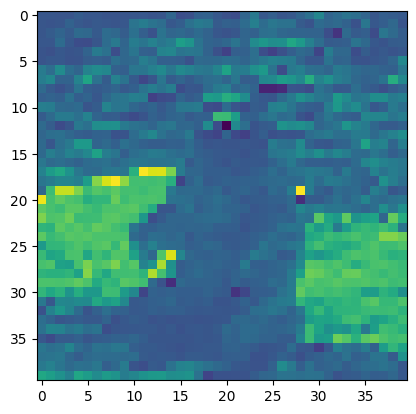

In [22]:
plt.imshow(convolved_filters[0, :, :, 0])

In [23]:
conv_images = []

for i in range(1, 6):
    conv = keras.layers.Conv2D(filters=1, 
              strides=i, 
              padding='same',
              kernel_size=5)
    
    convolved = conv(input_image)
    conv_images.append(convolved)

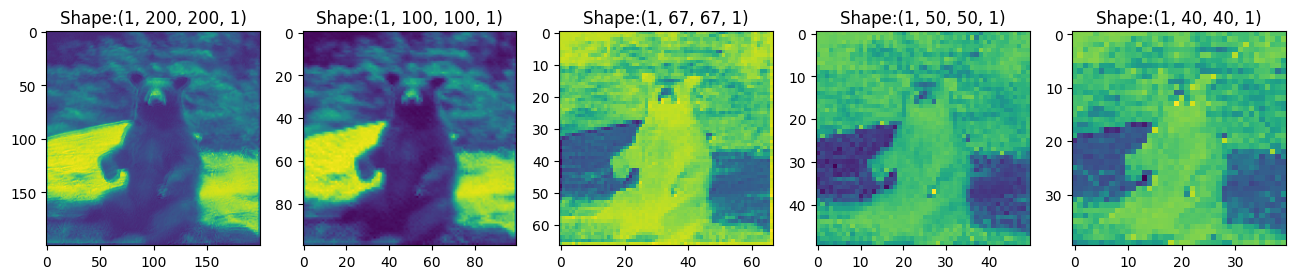

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))
for i, img in enumerate(conv_images):
    ax[i].imshow(img[0, :, :, 0])
    ax[i].set_title(f'Shape:{img.shape}')

In [25]:
conv_images_kernel_size = []

for i in range(1, 6):
    conv = keras.layers.Conv2D(filters=1, 
              strides=1, 
              padding='same',
              kernel_size=i)
    
    convolved = conv(input_image)
    conv_images_kernel_size.append(convolved)

In [26]:
conv_images_stride_size = []

for i in range(1, 6):
    conv = keras.layers.Conv2D(filters=1, 
              strides=i, 
              padding='same',
              kernel_size=5)
    
    convolved = conv(input_image)
    conv_images_stride_size.append(convolved)

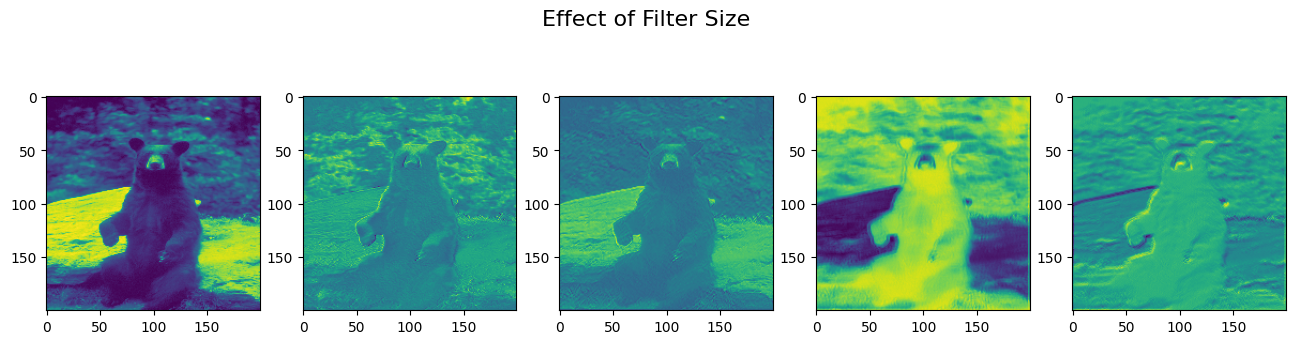

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))
fig.suptitle('Effect of Filter Size', fontsize=16)
for i, img in enumerate(conv_images_kernel_size):
    ax[i].imshow(img[0, :, :, 0])

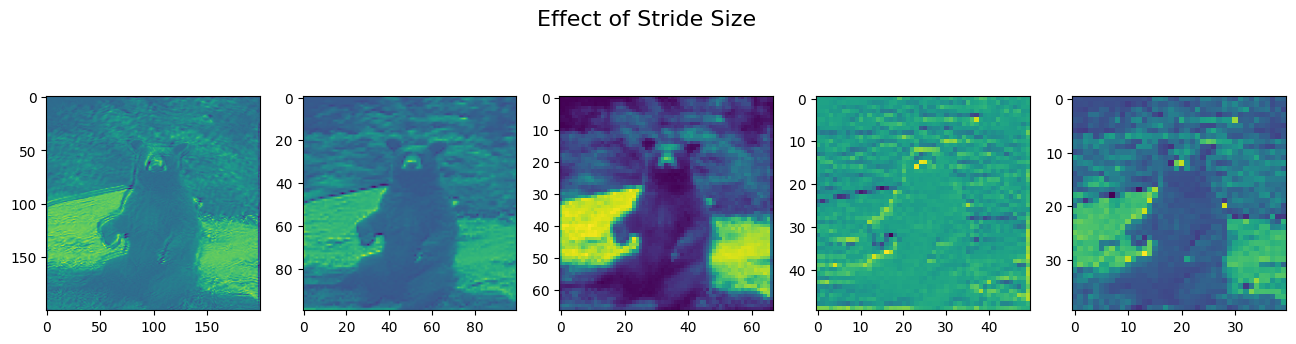

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))
fig.suptitle('Effect of Stride Size', fontsize=16)
for i, img in enumerate(conv_images_stride_size):
    ax[i].imshow(img[0, :, :, 0])

In [29]:
pooling = keras.layers.MaxPooling2D(2)
result = pooling(input_image)

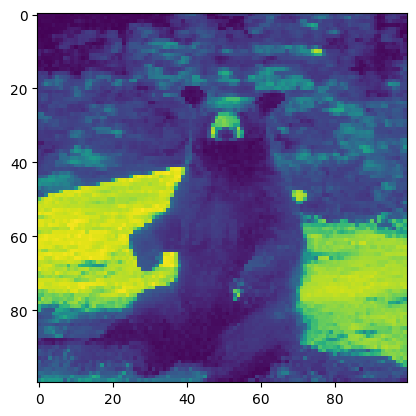

In [30]:
plt.imshow(result[0, :, :, 0])

In [31]:
lenet5 = keras.Sequential([
    keras.layers.Conv2D(6, (5,5), padding='same', input_shape=[28, 28, 1], activation='tanh'),
    keras.layers.AveragePooling2D((2,2)),
    
    keras.layers.Conv2D(16, (5,5), padding='same', activation='tanh'),
    keras.layers.AveragePooling2D((2,2)),
    
    keras.layers.Conv2D(120, (5,5), padding='same', activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'),
    # LeCunn used Radial Basis Function, which isn't built into Keras
    # Modern networks use 'softmax', so we'll use that instead to 
    # avoid having to define a custom activation function for now
    keras.layers.Dense(10, activation='softmax')    
])

lenet5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Sumit\Desktop\New folder\IBM-INTERNSHIP-WORK\practice\cors\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


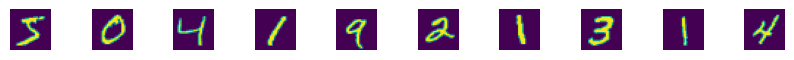

In [33]:
fig, ax = plt.subplots(1, 10, figsize=(10,2))
for i in range(10):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1) 

plt.show()

In [34]:
history = lenet5.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9320 - loss: 0.2228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9686 - loss: 0.1075
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9704 - loss: 0.0970
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9715 - loss: 0.0964
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9716 - loss: 0.0918


In [35]:
lenet5.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1095


[0.0925574004650116, 0.9718000292778015]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


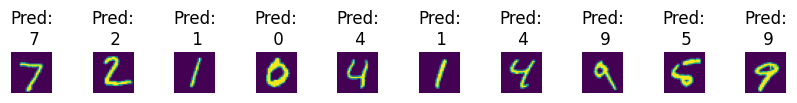

In [36]:
fig, ax = plt.subplots(1, 10, figsize=(10,2))
for i in range(10):
    img = x_test[i]
    pred = lenet5.predict(np.expand_dims(img, 0))
    
    ax[i].imshow(img)
    ax[i].set_title(f'Pred:\n {np.argmax(pred)}')
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()